**EXERCISE 28/05**



Fusionando el dataframe con el geodataframe:


In [ ]:
import os       #sirve para poder trabajar con los datos subidos
import geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [ ]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

#Se crea un nuevo DF

linkToFile='https://github.com/Journey-of-Success/introgeodf/raw/main/Population%20-%20total.csv'

ranking_Cia=pd.read_csv(linkToFile)

In [ ]:
#info
[fragilityCia.shape,ranking_Cia.shape,countries.shape]

[(171, 12), (237, 6), (252, 2)]

In [ ]:
ranking_Cia.head()

,name,slug,value,date_of_information,ranking,region
0,CHINA,china,"1,416,043,270",NaN,1,East and Southeast Asia
1,INDIA,india,"1,409,128,296",NaN,2,South Asia
2,UNITED STATES,united-states,"341,963,408",NaN,3,North America
3,INDONESIA,indonesia,"281,562,465",NaN,4,East and Southeast Asia
4,PAKISTAN,pakistan,"252,363,571",NaN,5,South Asia


In [ ]:
#Todo a mayúsculas
ranking_Cia['name']=ranking_Cia.name.str.upper()

In [ ]:
#Todo a mayúsculas
countries['COUNTRY']=countries.COUNTRY.str.upper()

Fusionando Ranking_Cia y Countries

In [ ]:
onlyRanking_Cia=set(ranking_Cia.name)- set(countries.COUNTRY)
only_first_map=set(countries.COUNTRY)- set(ranking_Cia.name)

In [ ]:
!pip install thefuzz  #instalando thefuzz
from thefuzz import process

[(country, process.extractOne(country,only_first_map)) for country in sorted(onlyRanking_Cia)]

[]

In [ ]:
# agrupando
[(country, process.extractOne(country,only_first_map)) for country in sorted(onlyRanking_Cia)
 if process.extractOne(country,only_first_map)[1]>=90]  #coincidencia mayor a 90

[]

In [ ]:
# luego:
try1={country: process.extractOne(country,only_first_map)[0] for country in sorted(onlyRanking_Cia)
 if process.extractOne(country,only_first_map)[1]>=90}
try1

{}

In [ ]:
ranking_Cia.replace(to_replace={'name':try1},inplace=True)

# actualizando
onlyRanking_Cia=set(ranking_Cia.name)- set(countries.COUNTRY)
only_first_map=set(countries.COUNTRY)- set(ranking_Cia.name)
# nuevas coincidencias
[(country, process.extractOne(country,only_first_map)) for country in sorted(onlyRanking_Cia)]

[]

In [ ]:
# el resto de forma manual

countries[countries.COUNTRY.str.contains('LAO|ESW|SWA|MYA|HONG|KOS')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
25,MYANMAR,"MULTIPOLYGON (((96.00681 16.38307, 96.06985 16..."
126,LAOS,"POLYGON ((104.25700 17.88763, 104.23943 17.937..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'MYANMAR':'BURMA'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

onlyRanking_Cia=set(ranking_Cia.name)- set(countries.COUNTRY)
only_first_map=set(countries.COUNTRY)- set(ranking_Cia.name)

[(country, process.extractOne(country,only_first_map)) for country in sorted(onlyRanking_Cia)]

[]

In [ ]:
# luego
try2={country: process.extractOne(country,only_first_map)[0] for country in sorted(onlyRanking_Cia)}
try2

{}

In [ ]:
# aplicando el cambio
ranking_Cia.replace(to_replace={'name':try2},inplace=True)

# última actualización
onlyRanking_Cia=set(ranking_Cia.name)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(ranking_Cia.name)

[(country, process.extractOne(country,only_first_map)) for country in sorted(onlyRanking_Cia)]

[]

In [ ]:
DF=countries.merge(ranking_Cia,left_on='COUNTRY', right_on='name')

DF.drop(columns=['name'],inplace=True)
# Nuevo mapa:
DF.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   COUNTRY              237 non-null    object  
 1   geometry             237 non-null    geometry
 2   slug                 237 non-null    object  
 3   value                237 non-null    object  
 4   date_of_information  8 non-null      object  
 5   ranking              237 non-null    int64   
 6   region               237 non-null    object  
dtypes: geometry(1), int64(1), object(5)
memory usage: 13.1+ KB


**Fusionando DF y fragilityCia**

In [ ]:
onlyFragilCia=set(fragilityCia.Country)- set(DF.COUNTRY)
only_second_map=set(DF.COUNTRY)- set(fragilityCia.Country)

In [ ]:
[(country, process.extractOne(country,only_second_map)) for country in sorted(onlyFragilCia)]

[("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('ST. LUCIA', 53))]

In [ ]:
# subsetting
[(country, process.extractOne(country,only_second_map)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,only_second_map)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (T

In [ ]:
# then:
try1={country: process.extractOne(country,only_second_map)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,only_second_map)[1]>=90}
try1

{}

In [ ]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# actualizando
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
only_second_map=set(countries.COUNTRY)- set(fragilityCia.Country)
# nuevas coincidencias
[(country, process.extractOne(country,only_second_map)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSI

In [ ]:
# ahora:
try2={country: process.extractOne(country,only_second_map)[0] for country in sorted(onlyFragilCia)}
try2

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CABO VERDE': 'CAPE VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'KOREA (THE REPUBLIC OF)': 'NORTH KOREA',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'AMERICAN SAMOA (US)',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'TIMOR-LESTE': 'EAST TIMOR',
 'UNITED ARAB EMIRATES 

In [ ]:
# aplicando los cambios
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap2=set(countries.COUNTRY)- set(fragilityCia.Country)

[(country, process.extractOne(country,onlyMap2)) for country in sorted(onlyFragilCia)]

[]

In [ ]:
InfoYMapa=DF.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

InfoYMapa.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
InfoYMapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   COUNTRY              173 non-null    object  
 1   geometry             173 non-null    geometry
 2   slug                 173 non-null    object  
 3   value                173 non-null    object  
 4   date_of_information  0 non-null      object  
 5   ranking              173 non-null    int64   
 6   region_x             173 non-null    object  
 7   Officialstatename    173 non-null    object  
 8   InternetccTLD        173 non-null    object  
 9   iso2                 172 non-null    object  
 10  iso3                 173 non-null    object  
 11  fragility_date       173 non-null    int64   
 12  fragility            173 non-null    float64 
 13  co2                  173 non-null    float64 
 14  co2_date             173 non-null    int64   
 15  region_y       

**Mapa de Coropleta**

In [ ]:
Nombres=['fragility', 'co2', 'ForestRev_gdp','ranking']

pd.melt(InfoYMapa[Nombres])

,variable,value
0,fragility,54.4
1,fragility,105.0
2,fragility,75.4
3,fragility,73.2
4,fragility,58.9
...,...,...
687,ranking,63.0
688,ranking,72.0
689,ranking,79.0
690,ranking,4.0


In [ ]:
!pip install -U scikit-learn

**Transformando los valores**

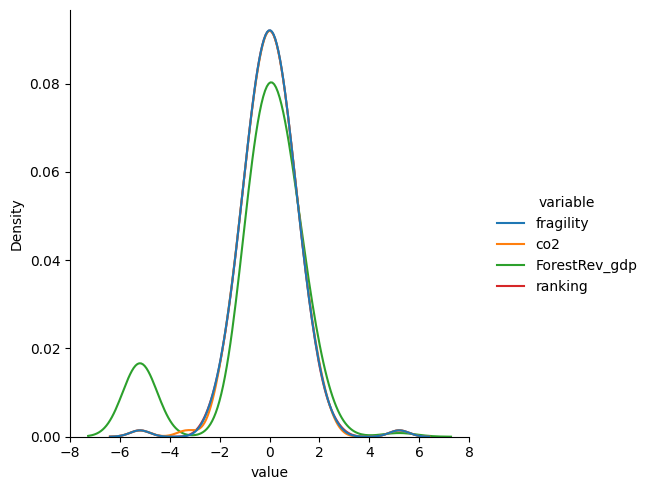

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer #Mismo propósito del robust

scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(InfoYMapa[Nombres])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=Nombres)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))


**Para "Fragility"**

In [ ]:
InfoYMapa['fragility_Qt']=QtScaled_data[:,0]

In [ ]:
! pip show numba mapclassify numpy

Name: numba
Version: 0.58.1
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, librosa, rmm-cu12
---
Name: mapclassify
Version: 2.6.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cudf-cu12, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine_rl, ecos, flax, folium, geem

In [ ]:
#En este caso se instala
!pip install mapclassify

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=InfoYMapa.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [ ]:
#Se utiliza la desviación absoluta alrededor de la mediana de la clase (ADCM) para hacer la comparación:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

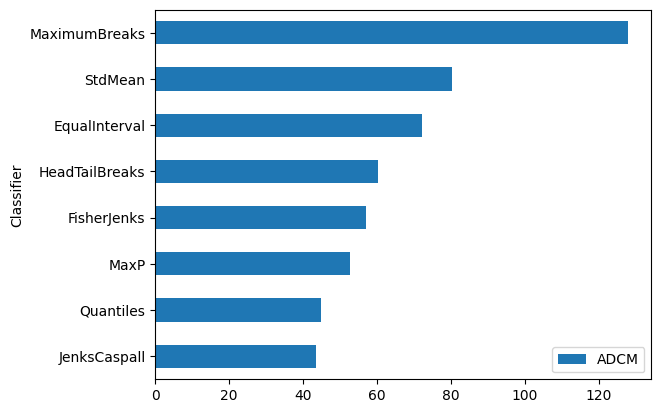

In [ ]:
# se plotea
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
InfoYMapa['fragility_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
InfoYMapa[['fragility_Qt','fragility_Qt_jc5']].head()

,fragility_Qt,fragility_Qt_jc5
0,-0.544238,1
1,1.752024,4
2,0.289440,2
3,0.218377,2
4,-0.438329,1


In [ ]:
indexList=['fragility_Qt_jc5']
aggregator={'fragility_Qt': ['mean']}

pd.concat([InfoYMapa[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,fragility_Qt_jc5,fragility_Qt
,,mean
0,0,-1.645438
1,1,-0.646447
2,2,-0.013112
3,3,0.629454
4,4,1.652632


In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

InfoYMapa['fragility_Qt_jc5_cat']=InfoYMapa.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
InfoYMapa[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

,fragility_Qt,fragility_Qt_jc5,fragility_Qt_jc5_cat
0,-0.544238,1,1_Good
1,1.752024,4,4_Poor
2,0.289440,2,2_Middle
3,0.218377,2,2_Middle
4,-0.438329,1,1_Good
5,-0.184181,2,2_Middle
6,0.947886,3,3_Bad
7,-0.288018,2,2_Middle
8,-0.288018,2,2_Middle
9,-0.777729,1,1_Good


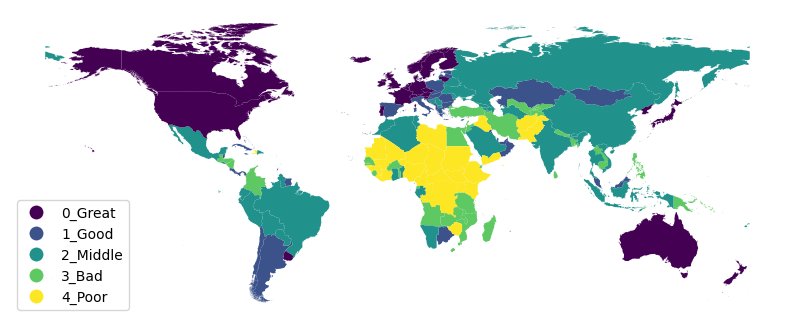

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
InfoYMapa.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

**CO2**

In [ ]:
InfoYMapa['co2_Qt']=QtScaled_data[:,1]

In [ ]:
np.random.seed(12345)

K=5

theVar=InfoYMapa.co2_Qt
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)

mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar)
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

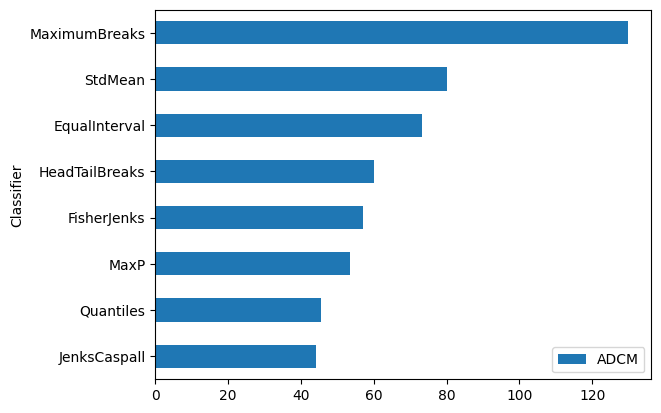

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])

adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]

adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
InfoYMapa['co2_Qt_jc5'] = jc5.yb

In [ ]:
InfoYMapa[['co2_Qt','co2_Qt_jc5']].head()

,co2_Qt,co2_Qt_jc5
0,-1.394877,0
1,-0.292694,2
2,0.907537,3
3,0.283653,2
4,-0.724923,1


In [ ]:
indexList=['co2_Qt_jc5']
aggregator={'co2_Qt': ['mean']}

pd.concat([InfoYMapa[['co2_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,co2_Qt_jc5,co2_Qt
,,mean
0,0,-1.652131
1,1,-0.630152
2,2,0.007303
3,3,0.646765
4,4,1.641372


In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

InfoYMapa['co2_Qt_jc5_cat']=InfoYMapa.loc[:,'co2_Qt_jc5'].replace(newLabelsForLevels)

# we have
InfoYMapa[['co2_Qt','co2_Qt_jc5','co2_Qt_jc5_cat']].head(20)

,co2_Qt,co2_Qt_jc5,co2_Qt_jc5_cat
0,-1.394877,0,0_Great
1,-0.292694,2,2_Middle
2,0.907537,3,3_Bad
3,0.283653,2,2_Middle
4,-0.724923,1,1_Good
5,-0.503613,1,1_Good
6,0.112795,2,2_Middle
7,-1.741291,0,0_Great
8,-1.741291,0,0_Great
9,0.978649,3,3_Bad


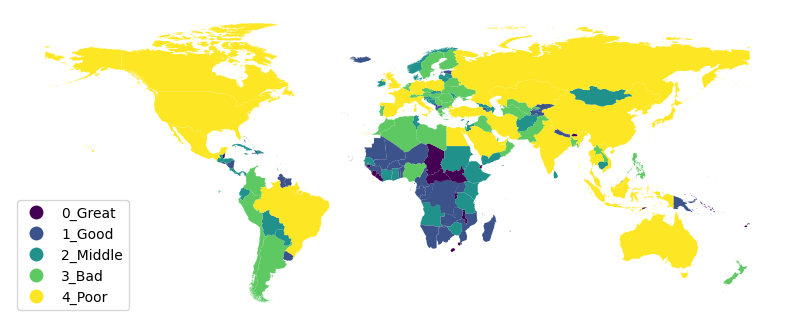

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
InfoYMapa.plot(column='co2_Qt_jc5_cat',
                   cmap='viridis',
                   categorical=True,
                   edgecolor='white',
                   linewidth=0.,
                   alpha=1,
                   legend=True,
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

**Forest variables**

In [ ]:
InfoYMapa['ForRev_gdp_Qt']=QtScaled_data[:,2]

In [ ]:
np.random.seed(12345)

K=5

theVar=InfoYMapa.ForRev_gdp_Qt
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)

mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar)
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

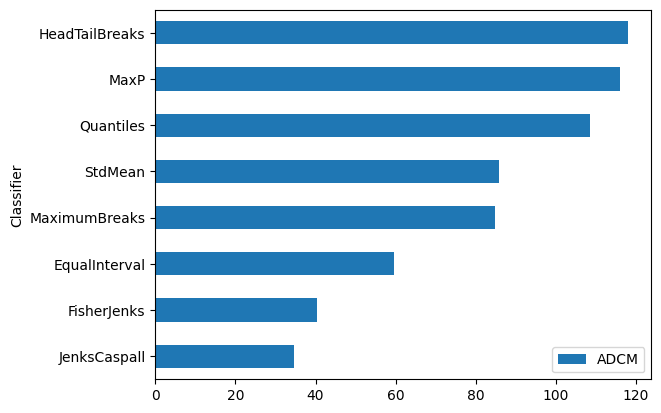

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])

adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]

adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
InfoYMapa['ForRev_gdp_Qt_jc5'] = jc5.yb

In [ ]:
InfoYMapa[['ForRev_gdp_Qt','ForRev_gdp_Qt_jc5']].head()

,ForRev_gdp_Qt,ForRev_gdp_Qt_jc5
0,-5.199338,0
1,-0.102491,2
2,-0.379817,1
3,-0.827130,1
4,-0.128240,2


In [ ]:
indexList=['ForRev_gdp_Qt_jc5']
aggregator={'ForRev_gdp_Qt': ['mean']}

pd.concat([InfoYMapa[['ForRev_gdp_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,ForRev_gdp_Qt_jc5,ForRev_gdp_Qt
,,mean
0,0,-5.199338
1,1,-0.725249
2,2,-0.030635
3,3,0.611432
4,4,1.618301


In [ ]:
# renaming
newLabelsForLevels={0:"0_Very_Low", 1:"1_Low", 2:"2_Average", 3:"3_High", 4:"4_Very_High"}

InfoYMapa['ForRev_gdp_Qt_jc5_cat']=InfoYMapa.loc[:,'ForRev_gdp_Qt_jc5'].replace(newLabelsForLevels)

# we have
InfoYMapa[['ForRev_gdp_Qt','ForRev_gdp_Qt_jc5','ForRev_gdp_Qt_jc5_cat']].head(20)

,ForRev_gdp_Qt,ForRev_gdp_Qt_jc5,ForRev_gdp_Qt_jc5_cat
0,-5.199338,0,0_Very_Low
1,-0.102491,2,2_Average
2,-0.379817,1,1_Low
3,-0.827130,1,1_Low
4,-0.128240,2,2_Average
5,0.079059,2,2_Average
6,0.184867,2,2_Average
7,0.051178,2,2_Average
8,0.051178,2,2_Average
9,-0.430727,1,1_Low


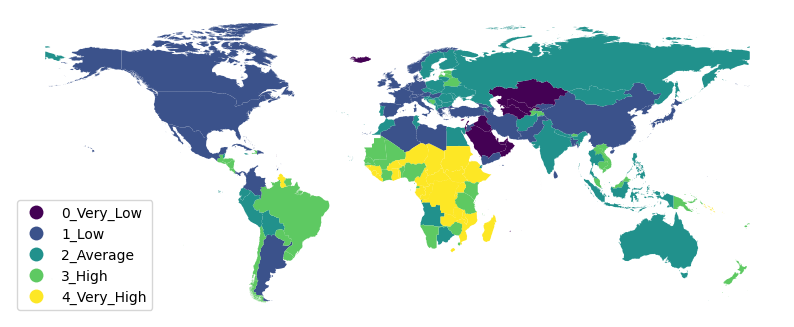

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
InfoYMapa.plot(column='ForRev_gdp_Qt_jc5_cat',
                   cmap='viridis',
                   categorical=True,
                   edgecolor='white',
                   linewidth=0.,
                   alpha=1,
                   legend=True,
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

**Ranking**

In [ ]:
InfoYMapa['ranking_Qt']=QtScaled_data[:,3]

In [ ]:
np.random.seed(12345)

K=5

theVar=InfoYMapa.ranking_Qt
ei5 = mapclassify.EqualInterval(theVar, k=K)
msd = mapclassify.StdMean(theVar)
q5=mapclassify.Quantiles(theVar,k=K)

mb5 = mapclassify.MaximumBreaks(theVar, k=K)
ht = mapclassify.HeadTailBreaks(theVar)
fj5 = mapclassify.FisherJenks(theVar, k=K)
jc5 = mapclassify.JenksCaspall(theVar, k=K)
mp5 = mapclassify.MaxP(theVar, k=K)

<Axes: ylabel='Classifier'>

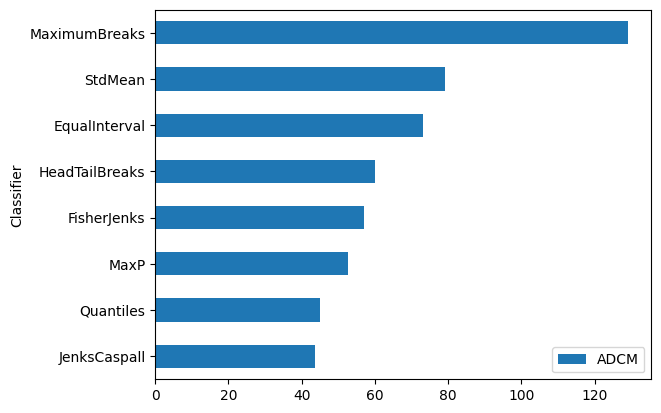

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
fits = np.array([ c.adcm for c in class5])

adcms = pd.DataFrame(fits)
adcms['classifier'] = [c.name for c in class5]

adcms.columns = ['ADCM', 'Classifier']

adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [ ]:
InfoYMapa['ranking_rate_Qt_jc5'] = jc5.yb

In [ ]:
InfoYMapa[['ranking_Qt','ranking_rate_Qt_jc5']].head()

,ranking_Qt,ranking_rate_Qt_jc5
0,2.295021,4
1,-0.892560,1
2,-0.959694,1
3,-0.087552,2
4,0.634237,3


In [ ]:
indexList=['ranking_rate_Qt_jc5']
aggregator={'ranking_Qt': ['mean']}

pd.concat([InfoYMapa[['ranking_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,ranking_rate_Qt_jc5,ranking_Qt
,,mean
0,0,-1.646804
1,1,-0.633366
2,2,0.007478
3,3,0.651976
4,4,1.674912


In [ ]:
# renaming
newLabelsForLevels={0:"0_Very_Low", 1:"1_Low", 2:"2_Average", 3:"3_High", 4:"4_Very_High"}

InfoYMapa['ranking_rate_Qt_jc5_cat']=InfoYMapa.loc[:,'ranking_rate_Qt_jc5'].replace(newLabelsForLevels)

# we have
InfoYMapa[['ranking_Qt','ranking_rate_Qt_jc5','ranking_rate_Qt_jc5_cat']].head(20)

,ranking_Qt,ranking_rate_Qt_jc5,ranking_rate_Qt_jc5_cat
0,2.295021,4,4_Very_High
1,-0.892560,1,1_Low
2,-0.959694,1,1_Low
3,-0.087552,2,2_Average
4,0.634237,3,3_High
5,0.657109,3,3_High
6,-0.808844,1,1_Low
7,1.924952,4,4_Very_High
8,-0.936847,1,1_Low
9,-0.568394,1,1_Low


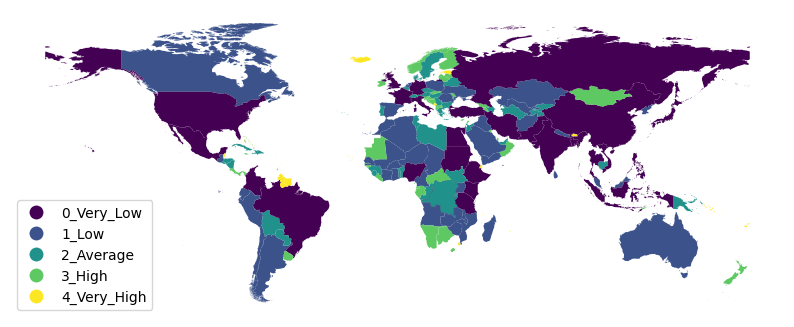

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
InfoYMapa.plot(column='ranking_rate_Qt_jc5_cat',
                   cmap='viridis',
                   categorical=True,
                   edgecolor='white',
                   linewidth=0.,
                   alpha=1,
                   legend=True,
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()